In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

keras.__version__

'2.8.0'

In [3]:
tf.__version__

'2.8.0'

# Load and process MNIST data for image classification

#### Load the MNIST dataset. 

The MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. We use pixel values as features to build a concolutional neural network to predict the `digit` of an image. So there are 10 labels of this dataset, including "0", "1", "2", "3", "4", "5", "6", "7", "8", and "9".

Loading MNIST data of 70,000 images may take some time.

In [10]:
from keras.datasets import mnist

#Download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The size of each image in MNIST data is 28x28. Different from multi-layer perceptron, each image is fed as 28x28 matrix to convolutional neural network directly

In [11]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [12]:
#Reshape data to (28, 28, 1) to fit convolution layer
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train, X_test = X_train / 255., X_test / 255.

y_train, y_test = y_train.astype(np.uint8), y_test.astype(np.uint8)

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

#### Plot some MNIST examples

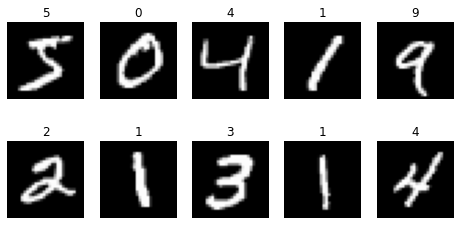

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data
def plot_digits(instances, labels, images_per_row=5):
    for i in range(len(instances)):
        idx = i // images_per_row
        idy = i % images_per_row 
        ax[idx, idy].imshow(instances[i].squeeze(), cmap="gray")
        ax[idx, idy].set_title(class_names[labels[i]])
        ax[idx, idy].axis("off")

fig, ax = plt.subplots(2, 5, figsize=(8, 4))
example_images = X_train[:10]
example_labels = y_train[:10]
plot_digits(example_images, example_labels, images_per_row=5)
plt.show()

# Use Keras to build a convolutional neural network for image classification

#### Construct all the layers in the convolutional neural network

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([                        #Input shape (28, 28, 1): one channel, each channel is 28x28
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),  
                                                         #Convolution layer, 32 channels, kernel size (3, 3), ReLU 
    keras.layers.MaxPooling2D((2,2)),                    #MaxPooling layer, pooling size (2, 2)
    keras.layers.Conv2D(64, (3, 3), activation="relu"),  #Convolution layer, 64 channels, kernel size (3, 3), ReLU 
    keras.layers.MaxPooling2D((2,2)),                    #MaxPooling layer, pooling size (2, 2)
    keras.layers.Flatten(),                              #Flatten all channels into a feature vector
    keras.layers.Dense(10, activation="softmax")         #Output layer, 10 neurons, softmax
])

In [22]:
model.layers

#### Display the model structure with parameters

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

#### Set up some hyperparameters: use cross entropy loss, min-batch gradient descent, adam optimizer, and print out accruacy during training

In [24]:
model.compile(loss="sparse_categorical_crossentropy",    #Cross entropy loss function
              optimizer="adam",                          #Adam optimizer
              steps_per_execution=64,                    #Batch size 64
              metrics=["accuracy"])                      #Using accuracy

#### Train the model: use 10 epochs, and display training loss, training accuracy, validation loss, and validation accuracy during model training

In [25]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1563 - accuracy: 0.9532 - val_loss: 0.0638 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0459 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0287 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0279 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0317 - val_a

#### Plot the training results

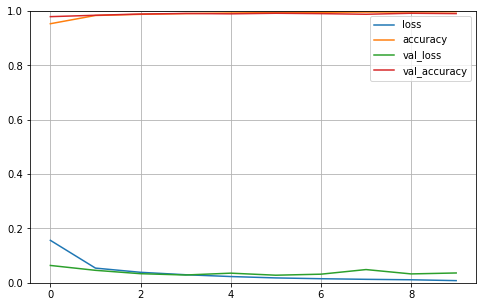

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluate the trained convolutional neural network

#### Evaluate the train convolutional neural network using model.evaluation()

Here, we can use model.evaluation() directly to get the loss and accuracy on the test data. This will return two results, where the first one is test loss and the second one is the test accuracy.

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0362 - accuracy: 0.9904


[0.03615792095661163, 0.9904000163078308]

#### Evaluate the train convolutional neural network using accuracy and F1-score

In [28]:
y_proba = model.predict(X_test)
y_proba.round(2)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Prediction labels:

In [29]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

#### Output the confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 977    0    0    0    0    1    1    1    0    0]
 [   0 1129    1    2    0    0    2    1    0    0]
 [   2    1 1022    0    3    0    0    4    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   2    0    1    4    0  882    1    1    1    0]
 [   2    2    0    0    5    1  946    0    2    0]
 [   0    4    7    0    0    1    0 1014    1    1]
 [   2    0    1    1    1    1    0    1  965    2]
 [   1    0    0    0   12    5    0    3    3  985]]


#### Calculate accuracy, macro F1-score, and micro F1-score

In [31]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, y_pred)
macrof1 = f1_score(y_test, y_pred, average='macro')
microf1 = f1_score(y_test, y_pred, average='micro')
print('Accuracy: {:.2f}'.format(acc))
print('Macro F1-score: {:.2f}'.format(macrof1))
print('Micro F1-score: {:.2f}'.format(microf1))

Accuracy: 0.99
Macro F1-score: 0.99
Micro F1-score: 0.99
